# Introduction to Scikit-Learn

Scikit-Learn (sklearn) is a powerful Python package for machine learning. The goals of this tutorial are:

1. To learn how to use Scikit-Learn to implement machine learning models.
2. To understand the general structure of using the Scikit-Learn API.

The main framework for implementing machine learning models in sklearn are:

1. Import the sklearn objects you need for the code
2. Prepare a set of preprocessed (namely cleaned and scaled) data to give your model.
3. Create the model object in your code.
4. Use the model object to train your model using the appropriate training method (usually `fit()`)
5. Apply model to data that the model has not seen (test data) using the appropriate prediction/transformation method (usually `predict()`)

Understanding this structure and the methods within the sklearn objects that accomplish this are all you need in order to work with sklearn.

In this tutorial we will cover features of sklearn that allow you to:

- Load and preprocess data
- Implement supervised learning models
- Implement unsupervised learning models

This notebook introduces these concepts with example code cells. Attendees are expected to follow along and execute the code cells themselves. I will explain what each of the commands do in the code blocks.  

I have included a few practice examples at the end of the tutorial.

In [1]:
# Import sklearn and print the version
import sklearn
print(sklearn.__version__)

1.3.0


## Data preprocessing

Data preprocessing is an essential step before applying any machine learning algorithm. In general, you are not handed a ready-to-use dataset. Datasets often contain incorrect data, missing data, and data with different scales adn types. 

Before you can extract useful information from the data through a machine learnign algorithm, you will need to preprocess the data. In this section we will demonstrate the following topics:

- Loading datasets

    - Toy datasets
    - External datasets
    - Generated datasets
    - Real world dataset
 
- Exploratory data analysis

    - Pandas tools
    - Basic visualization
    
- Test train splits

- Scaling datasets

    - Scaler object
    - Min-max scaling
    - Standardization

### Toy datasets

Scikit learn provides some built in toy datasets. There is an easy API call to load these datasets. Scikit-learn's toy datasets make it easy to test out many kinds of machine learning algorithms.  The list of datasets is at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets). The following code cell shows how to import a built-in toy dataset.

In [2]:
from sklearn import datasets

X = datasets.load_iris()

print(X)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

What kind of object is X? You can find this out by using the `type()` method.

In [3]:
print(type(X))

<class 'sklearn.utils._bunch.Bunch'>


This means we are working with an object of type `Bunch`. The `Bunch` object X has the following attributes:

- `data`: the data matrix
- `target`: the classification target
- `feature_names`: the names of the dataset columns
- `target_names`: the names o the target classes

To access the 2 numpy 2 arrays that contain the data matrix and the target values you use these commands

1. `X_data = X["data"]` or `X.data`
2. `X_target = X["target"]` or `X.target`

The same syntax works for `feature_names` or `target_names`.

You can read more about this data type at this [link](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html). Let's see this in action

In [ ]:
print(X)

In [4]:
X_data = X["data"]
print(X_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
X_target = X["target"]
print(X_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(type(X_data))
print(type(X_target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


It is also possible to load the data as a Pandas dataframe. Pandas is a Python package for storing and manipulating data. In Pandas, data is stored in a Dataframe object. The dataframe object stores data in a table (rows and columns). Additionally, the dataframe object has methods to manipulate and analyze the data it contains. 

In [7]:
Z = datasets.load_iris(as_frame=True)
print(Z)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [8]:
Z_data = Z["data"]
print(type(Z_data))
print(Z_data.head())

<class 'pandas.core.frame.DataFrame'>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
Z_target = Z["target"]
print(type(Z_target))
print(Z_target.head())

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [10]:
Z_names = Z["target_names"]
print(Z_names)

['setosa' 'versicolor' 'virginica']


## Loading other datasets

In general you do not develop machine learning applications with a toy dataset. Instead your dataset comes from a database or a file (e.g., csv, Excel). Scikit-learn offers limited tools to import files. This means you have to use other tools, like  Pandas to import your file into dataframes or arrays. To load a `.csv` file you can use the Pandas method `read_csv()`, see this [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for the full documentation.

In [11]:
import pandas as pd
print(pd.__version__)

2.0.3


In [12]:
df = pd.read_csv("datasets/Salaries.csv")
print(df.head())

   rank discipline  phd  service   sex  salary
0  Prof          B   56       49  Male  186960
1  Prof          A   12        6  Male   93000
2  Prof          A   23       20  Male  110515
3  Prof          A   40       31  Male  131205
4  Prof          B   20       18  Male  104800


## Generating a dataset

Scikit-learn has built in functions that allow you to create a random dataset These randomly generated datasets can then be used to explore various machine learning algorithms.

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

In [15]:
print(type(X), type(y))
print(X.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(100, 2)


In [16]:
print(y)

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


We can plot the data that we just created using the [matplotlib](https://matplotlib.org/). 

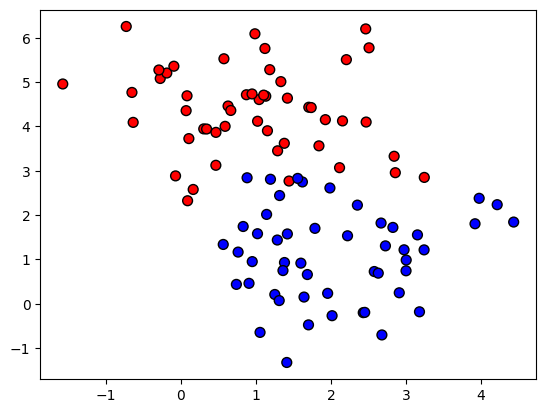

In [17]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'};
c_arr=[colors[k] for k in y]
plt.scatter(X[:, 0], X[:, 1], marker="o", c=c_arr, s=50, edgecolor="k");

## Real world data sets

Using scikit-learn you can also import real world datasets. The real world datasets are larger than the toy datasets.

In [18]:
from sklearn.datasets import fetch_california_housing
RW = fetch_california_housing(as_frame=True)

In [19]:
RW_data = RW["data"]
RW_target = RW["target"]

In [20]:
RW_data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [21]:
RW_target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [22]:
RW.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

## Exploratory data analysis

It is important to explore and understand your dataset prior to applying machine learning algorithms to it. There are a few functions in Pandas that are helpful for this. 

We will explore these functions using the iris dataset first. We will perform a few transformations on this dataset prior to the analysis.

In [24]:
## Data manipulation
Z_df = Z.frame

Z_df["target_names"] =Z_df["target"].replace(to_replace=
                                             {0: Z.target_names[0], 
                                              1: Z.target_names[1], 
                                              2: Z.target_names[2]})
print(Z_df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4    

In [25]:
print(Z_df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target target_names  
145       2    virginica  
146       2    virginica  
147       2    virginica  
148       2    virginica  
149       2    virginica  


In [26]:
## Pandas info
Z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
## Pandas describe
Z_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

It is also very helpful to visualize variables of interest. We will use a visualization package called [Seaborn](https://seaborn.pydata.org/). Seaborn is intended for visualizing statistical data. In particular, most functions require as input a dataframe.

In [28]:
## Seaborn to visualize data
import seaborn as sns
print(sns.__version__)

0.12.2


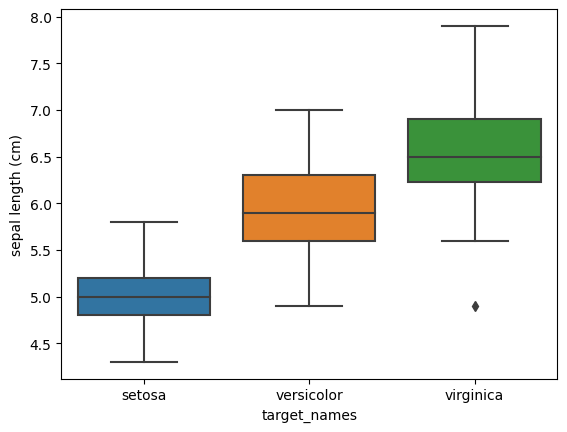

In [29]:
## Boxplot
sns.boxplot(data=Z_df, x="target_names", y="sepal length (cm)");

/share/pkg.8/python3/3.10.12/install/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


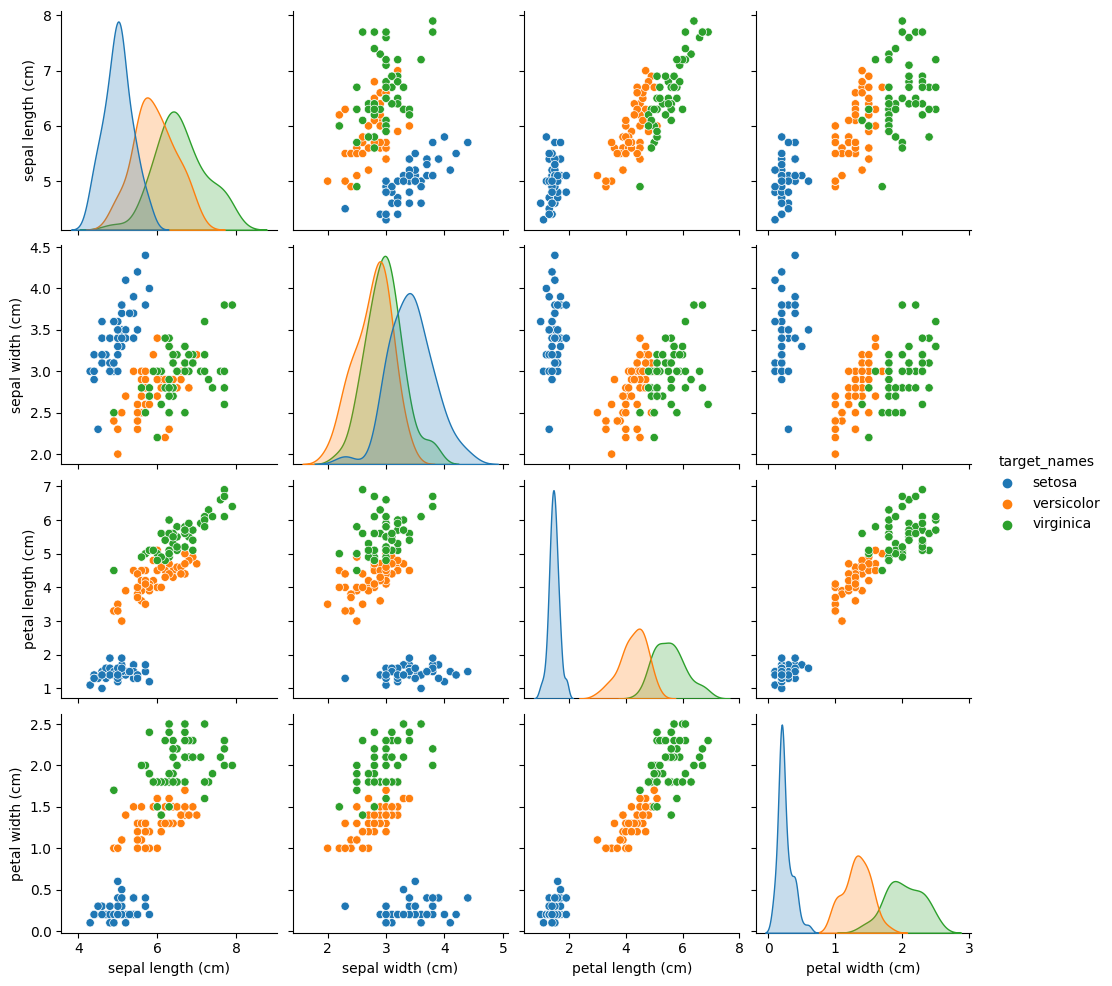

In [30]:
## Pairplot
sns.pairplot(Z_df.drop("target", axis=1), hue="target_names");

## Exercises
Let's do some exploratory data analysis on the RW_data set.

In [31]:
### Determine if there are any null values in the RW_data dataframe ###
RW_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [32]:
### Compute the descriptive statistics of all the input features ###
RW_data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

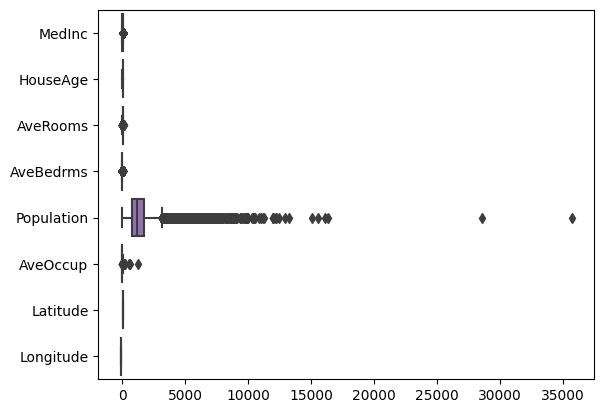

In [33]:
### Create a horizontal box plot RW_DATA
### What is an important observation from this plot?
### How is it a useful visualzation? How is it not a useful visualization?
sns.boxplot(data=RW_data, orient="h");

## Dataset summary

We have 4 datasets stored in our notebook which we summarize below

- Iris dataset (toy dataset)
- Generated dataset 
- California housing dataset (real world dataset)
- Salaries dataset (toy dataset)


We will used these datasets in subsequent cells of the notebook when we explore more techniques in Scikit-learn.

## Test train split

In order to train and test your model you need to split your dataset into two sets:

- training set
- test set

This is easy to accomplish with `sklearn.model_selection.train_test_split`.

We will see how this function works using our generated dataset. This is because it is small and easy to confirm the expected behavior.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
print("Shape of X_train: ", X_train.shape, ", Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape, ", Shape of y_test: ", y_test.shape)

Shape of X_train:  (80, 2) , Shape of X_test:  (20, 2)
Shape of y_train:  (80,) , Shape of y_test:  (20,)


## Scaling data

We have now observed and explored a few different datasets. One important observation we made was that our datasets can have very different scales.

Why is it not a good idea to run a machine learning algorithm on a dataset where the input features have scales that differ by orders of magnitude?

What can we do to fix this? As the title of this section suggests, we will scale our data. This is a way to ensure that the numerical features of our datasets have scales that are of the same order of magnitude.

Here are a few common ways to scale data:

    - Standard scaling
    - Min-Max scaling
    
These (and others) are all implemented in scikit-learn. The methodology for using a scaling technique in scikit-learn is similar. You will always start by creating a scaler object and then use this object to scale your data.

### Standard Scaling
Standard scaling scales data so that all the numerical features have zero mean and unit variance.

Since the scales of the RW dataset were very different, we will apply the scaler to this dataset and then replot the box and whisker plot.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RW_standard = scaler.fit_transform(RW_data)
print(RW_standard)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [40]:
RW_standard_df = pd.DataFrame(RW_standard, columns=RW_data.columns)
RW_standard_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818

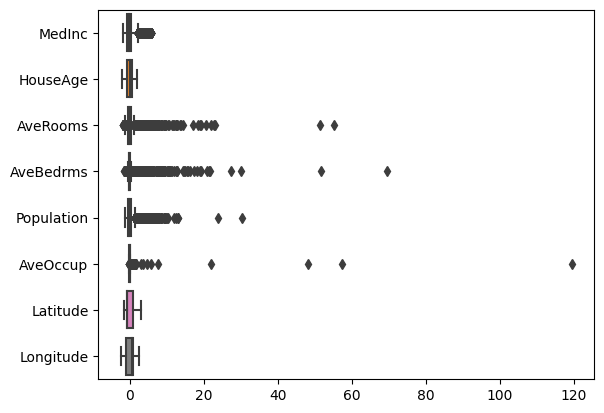

In [38]:
sns.boxplot(data=RW_standard_df, orient="h");

### Min-max scaling

We can also do min-max scaling which puts everything in a range between 0 and 1.

In [41]:
from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
RW_minmax = mscaler.fit_transform(RW_data)
RW_minmax_df = pd.DataFrame(RW_minmax, columns=RW_data.columns)
RW_minmax_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   

   Longitude  
0   0.211155  
1   0.212151  
2   0.210159  
3   0.209163  
4   0.209163

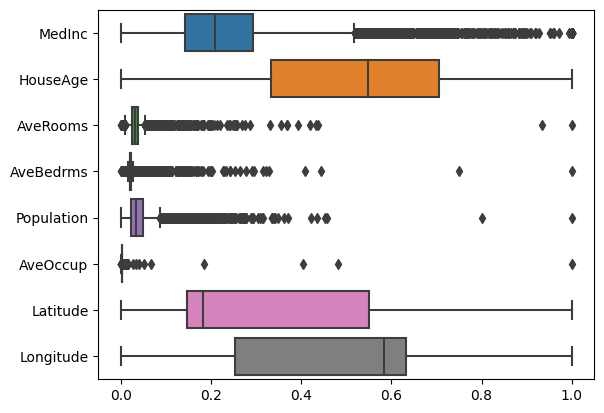

In [42]:
sns.boxplot(data=RW_minmax_df, orient="h");

## Supervised learning

In this section we will cover supervised learning algorithms in Scikit-Learn. Supervised learning is a machine learning technique where we train a model using *labeled* data. This trained model can then be used to predict values on new data.

There are two broad categories of supervised learning:

- Regression, when the model predicts continuous variables
- Classification, when the model segments data into classes

Scikit-learn has a standardized API which makes it easy to train different models with very similar pieces of code. Generally you will create an object for the model that you want, e.g., `LinearRegression`or `LogisticRegression`. These objects have all the methods you need to train your model and then predict values on your model.

We will cover the following supervised learning methods:

- Linear regression (regression)
- Logistic regression (classification)

### Notation
We introduce notation and the general ideas behind 

- A pair $(x^{(i)}, y^{(i)})$ is called a training example
- A set $\{(x^{(i)}, y^{(i)})\}_{i=1}^{m}$ is called a training set
- The goal is to find a function $h(x)$ that is  good at predicting targets $y$
- Assume $\hat{y} = h_{w}(x)$ depends on a parameter $w$ (or parameters $w_{i}$ if $x$ is a vector)
- Use the labeled training set to *learn* the parameter(s) $w$ for the function $h_{w}(x)$
- The fully trained $h_{w}(x)$ is referred to as a *model*

## Linear regression

To create a linear regression model in scikit-learn you will instantiate the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object.

We use the scaled Calfornia housing dataset to demonstrate how to create this object, train the model, and then predict on the test set.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Fetch data
RW = fetch_california_housing()
X = RW["data"]
y = RW["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create regression model
reg = LinearRegression()
# Train
reg.fit(X_train, y_train)

# Predict on test set
y_pred = reg.predict(X_test)

# R^2 value
r2 = reg.score(X_test, y_test)
print("The R^2 score is : ", r2)

# Report Mean Square Error (mse)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

The R^2 score is :  0.60858426002245
Mean squared error:  0.5159703765453236


In [46]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Fetch data
Iris = load_iris()
X = Iris["data"]
y = Iris["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create regression model
reg = LogisticRegression()
# Train
reg.fit(X_train, y_train)

# Predict on test set
y_pred = reg.predict(X_test)


# Classification report
print(classification_report(y_test, y_pred, target_names=Iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.89      0.94        18
   virginica       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



## Unsupervised learning

In this section we will cover unsupervised learning algorithms in Scikit-Learn. Unsupervised learning is a machine learning technique where we train a model using *un-labeled* data. With unsupervised learning algorithms you are extracting information from the data itself without any labels.

Somes examples of unsupervised learning techniques that we cover are:

- Clustering
- Principal Component Analysis (PCA)

## Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Here we will consider K-means clustering, where we will cluster objects into k-clusters. The clusters will be formed by determimning centroids of each cluster, then membership to the cluster is determined by an observations shortest distance to the centroid.

For this problem we will work with a generated dataset.

In [53]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Generate data with 2 clusters
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=10)

# Create bcluster object
cluster = KMeans(n_clusters=2, n_init="auto");

# Train cluster model
cluster.fit(X);

print("Cluster centers: ", cluster.cluster_centers_)

Cluster centers:  [[ 2.64553037  5.00672164]
 [ 2.72491832 -7.60866643]]


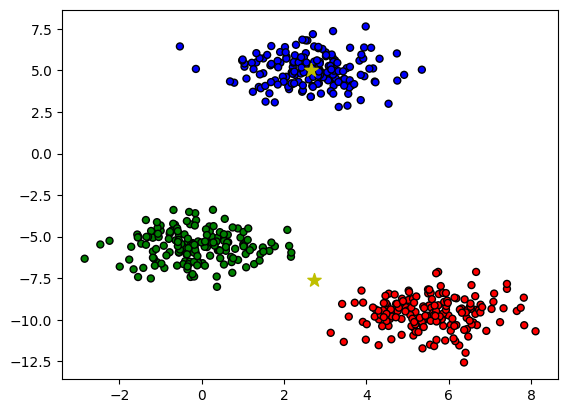

In [55]:
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue', 2:'green'};
c_arr=[colors[k] for k in y]
plt.scatter(X[:, 0], X[:, 1], marker="o", c=c_arr, s=25, edgecolor="k");
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker='*', s=100, c='y');

## Principal component analysis (PCA)

PCA is an unsupervised machine learning algorithm that helps to reduse the dimension of your data. The dimension of your data is the number of input features. This algorithm finds a reduced set of input features in the data that account for the majority of the variance in the data. This means that you can work with a smaller set of input features (smaller data), but you are not losing the important information from the full set of input features.

In [56]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
print("Feature names: ", iris.feature_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [59]:
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
#
X_r = pca.fit_transform(X)
print("Shape of X: ", X.shape, "Shape of X_r: ", X_r.shape)

Shape of X:  (150, 4) Shape of X_r:  (150, 2)


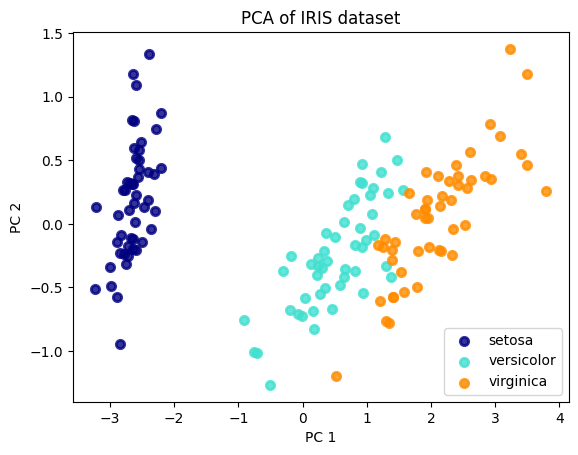

In [60]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of IRIS dataset");

## Summary

We have covered many topics in this tutorial. We have seen how to preprocess data and train supervised and unsupervised machine learning. We can also compute simple metrics tos evaluate the performance of these models.  Hopefully this has given you a better idea of how to use sklearn.


Remember that the main framework for working with sklearn has the following structure:

1. Import the sklearn objects you need for the code.
2. Prepare a set of preprocessed (namely cleaned and scaled) data to give your model (usually in the form of numpy arrays).
3. Create the model object in your code.
4. Use the model object to train your model using the appropriate training method (usually `fit()`).
5. Apply the model to data that the model has not seen (test data) using the appropriate prediction/transformation method (usually `predict()`).

This structure and knowing the methods within the various data and model classes that accomplish this are all you need in order to work with sklearn.

## Exercises

In [ ]:
## Exercise 1 ##
# Using the Calfornia housing dataset:
# Train a regression model only on the first four features MedInc HouseAge AveRooms AveBedrms
# Evaluate the performance of this model using MSE
# Does this reduced set of features give better performance than the full set of input features?

In [ ]:
## Exercise 2 ##
# Load the breast cancer dataset
# Create and train a random forest model on this dataset, call this object model1
# Crete and train a logistic regression model on this dataset, call this object model2
# Evaluate the performance of both models
# Which model is more accurate?
# Which model is a better choice for this application and why?

In [ ]:
## Exercise 3 ##
# Generate a dataset with 4 blobs using these paramenters
# Perform K-means clustering to cluster the 4 blobs using these parameters
# Evaluate the model using the function score()
# Try to get more than 90% accuracy on the model

Tutorial evaluation at rcs.bu.edu/eval

In [ ]:
Scott Ladenheim
saladenh@bu.edu

help@rcs.bu.edu